In [ ]:
#Code to upload the data
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:


# training data
housing = pd.read_csv('train.csv') 
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
pd.set_option('display.max_rows', None)
housing.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

##Filling Null values

In [ ]:
#Filling NULL values with respective values
housing['LotFrontage']=housing['LotFrontage'].fillna(housing['LotFrontage'].median())
housing['Alley']=housing['Alley'].fillna('No')
housing['GarageYrBlt']= housing['GarageYrBlt'].fillna(0)
housing['MasVnrArea']=housing['MasVnrArea'].fillna(0)
housing['MasVnrType']=housing['MasVnrType'].fillna('None')
housing['BsmtQual']=housing['BsmtQual'].fillna('None')
housing['BsmtCond']=housing['BsmtCond'].fillna('None')
housing['BsmtExposure']=housing['BsmtExposure'].fillna('None')
housing['BsmtFinType1']=housing['BsmtFinType1'].fillna('None')
housing['BsmtFinType2']=housing['BsmtFinType2'].fillna('No')
housing['Electrical']=housing['Electrical'].fillna(housing['Electrical'].mode()[0])
housing['FireplaceQu']=housing['FireplaceQu'].fillna('No')
housing['GarageType']=housing['GarageType'].fillna('No')
housing['GarageFinish']=housing['GarageFinish'].fillna('No')
housing['GarageQual']=housing['GarageQual'].fillna('No')
housing['GarageCond']=housing['GarageCond'].fillna('No')
housing['PoolQC']=housing['PoolQC'].fillna('No')
housing['Fence']=housing['Fence'].fillna('No')
housing['MiscFeature']=housing['MiscFeature'].fillna('No')

In [ ]:
#No more null values
housing.isnull().sum().sum()

0

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##Finding Outliers if any

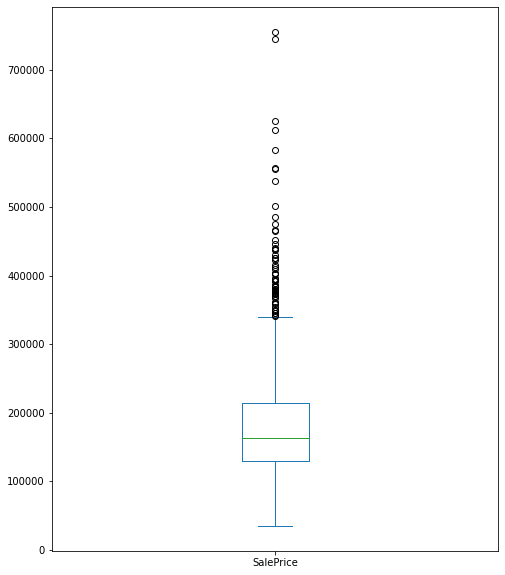

In [ ]:
plt.figure(figsize=(8,10))
housing.SalePrice.plot.box()
plt.show()

### Outliers are approx. SalePrice>340000

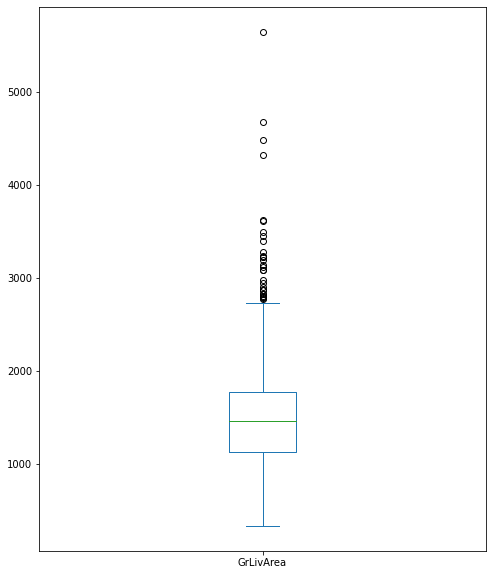

In [ ]:
plt.figure(figsize=(8,10))
housing.GrLivArea.plot.box()
plt.show()

In [ ]:
housing[housing['GrLivArea']>4000]['SalePrice']

523     184750
691     755000
1182    745000
1298    160000
Name: SalePrice, dtype: int64

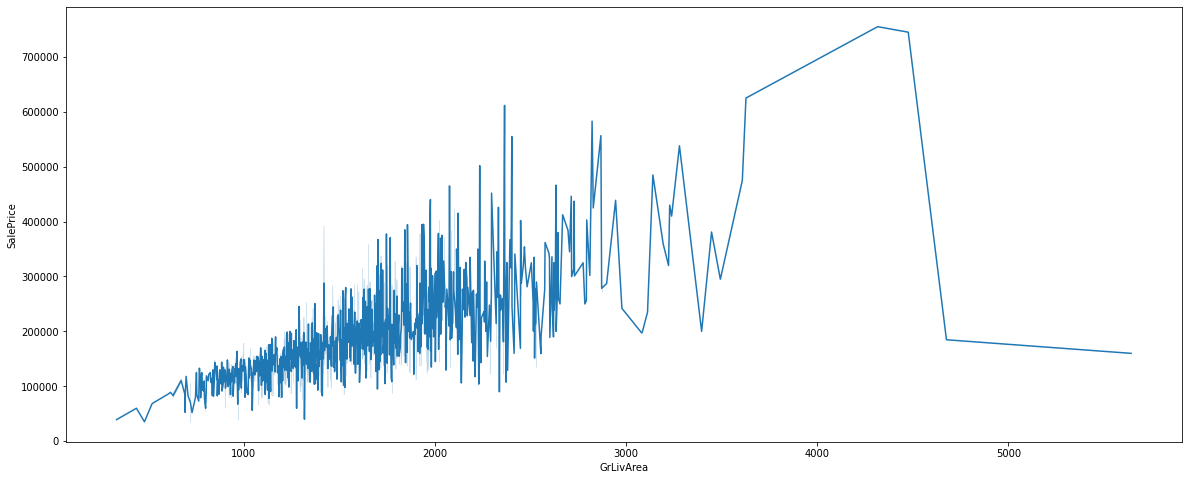

In [ ]:
#Lets check the way SalePrice is impacted by GrLiveArea
#Below trend shows that Sale Price have a defined correlation with GrLivArea
#We could observer Sale Price increases if there is increase in GrLivArea, but drops steep when it is greaterthan ~4500
plt.figure(figsize=(20,8))
sns.lineplot(x='GrLivArea',y='SalePrice',data=housing)
plt.show()

##May be due to two outliers which have less than 34000 sale price are creating the steep drop in the plot. Lets remove those two

In [ ]:
housing[(housing['GrLivArea']>4000) & (housing['SalePrice']<340000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,No,IR1,Bnk,AllPub,...,0,No,No,No,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,No,IR3,Bnk,AllPub,...,480,Gd,No,No,0,1,2008,New,Partial,160000


In [ ]:
housing=housing[~((housing['GrLivArea']>4000) & (housing['SalePrice']<340000))]

In [ ]:
housing.shape

(1458, 81)

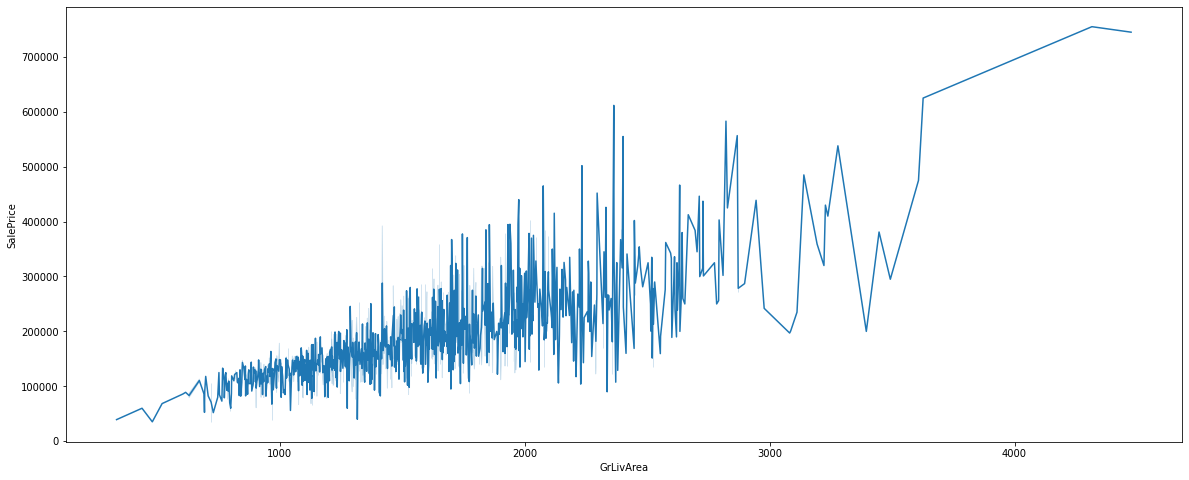

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(x='GrLivArea',y='SalePrice',data=housing)
plt.show()

In [ ]:
# dropping SaleType and id 
housing = housing.drop(['SaleType','Id'], axis=1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No,Reg,Lvl,AllPub,Inside,...,0,0,No,No,No,0,2,2008,Normal,208500
1,20,RL,80.0,9600,Pave,No,Reg,Lvl,AllPub,FR2,...,0,0,No,No,No,0,5,2007,Normal,181500
2,60,RL,68.0,11250,Pave,No,IR1,Lvl,AllPub,Inside,...,0,0,No,No,No,0,9,2008,Normal,223500
3,70,RL,60.0,9550,Pave,No,IR1,Lvl,AllPub,Corner,...,0,0,No,No,No,0,2,2006,Abnorml,140000
4,60,RL,84.0,14260,Pave,No,IR1,Lvl,AllPub,FR2,...,0,0,No,No,No,0,12,2008,Normal,250000


In [ ]:
# correlation matrix
cor = housing.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.374402,-0.142033,0.032522,-0.059275,0.027757,0.040503,0.023423,-0.074434,-0.065624,...,-0.012681,-0.006659,-0.012002,-0.043813,-0.026004,0.008090,-0.007675,-0.013581,-0.021386,-0.084276
LotFrontage,-0.374402,1.000000,0.274299,0.219256,-0.050705,0.110368,0.076284,0.150829,0.133126,0.047341,...,0.069811,0.105055,0.014333,0.066042,0.042121,0.100311,0.000600,0.023932,0.006792,0.352688
LotArea,-0.142033,0.274299,1.000000,0.091392,-0.002723,0.007462,0.007500,0.083715,0.175320,0.114297,...,0.168621,0.061861,-0.016505,0.021362,0.045288,0.036491,0.039072,0.005744,-0.013699,0.268179
OverallQual,0.032522,0.219256,0.091392,1.000000,-0.090442,0.571368,0.549827,0.398785,0.222467,-0.058324,...,0.236753,0.297186,-0.113176,0.030991,0.066298,0.044758,-0.031238,0.072531,-0.026575,0.795774
OverallCond,-0.059275,-0.050705,-0.002723,-0.090442,1.000000,-0.375572,0.074615,-0.124261,-0.042987,0.040034,...,-0.002675,-0.029800,0.070120,0.025426,0.054632,0.002321,0.068728,-0.003735,0.043795,-0.077948
YearBuilt,0.027757,0.110368,0.007462,0.571368,-0.375572,1.000000,0.592105,0.308722,0.249818,-0.048683,...,0.223700,0.184116,-0.387093,0.031578,-0.049972,-0.005171,-0.034273,0.012975,-0.013250,0.523608
YearRemodAdd,0.040503,0.076284,0.007500,0.549827,0.074615,0.592105,1.000000,0.172590,0.123039,-0.067377,...,0.204591,0.222790,-0.193551,0.045504,-0.038360,-0.003426,-0.010160,0.022020,0.036145,0.507717
MasVnrArea,0.023423,0.150829,0.083715,0.398785,-0.124261,0.308722,0.172590,1.000000,0.235545,-0.070533,...,0.156812,0.101698,-0.109126,0.019933,0.064258,-0.020350,-0.029346,-0.005006,-0.007215,0.477810
BsmtFinSF1,-0.074434,0.133126,0.175320,0.222467,-0.042987,0.249818,0.123039,0.235545,1.000000,-0.049622,...,0.204993,0.072717,-0.103853,0.029177,0.068389,0.052981,0.004741,-0.004281,0.015767,0.409384
BsmtFinSF2,-0.065624,0.047341,0.114297,-0.058324,0.040034,-0.048683,-0.067377,-0.070533,-0.049622,1.000000,...,0.068312,0.004974,0.036406,-0.030041,0.088774,0.046350,0.004905,-0.015362,0.031618,-0.011422


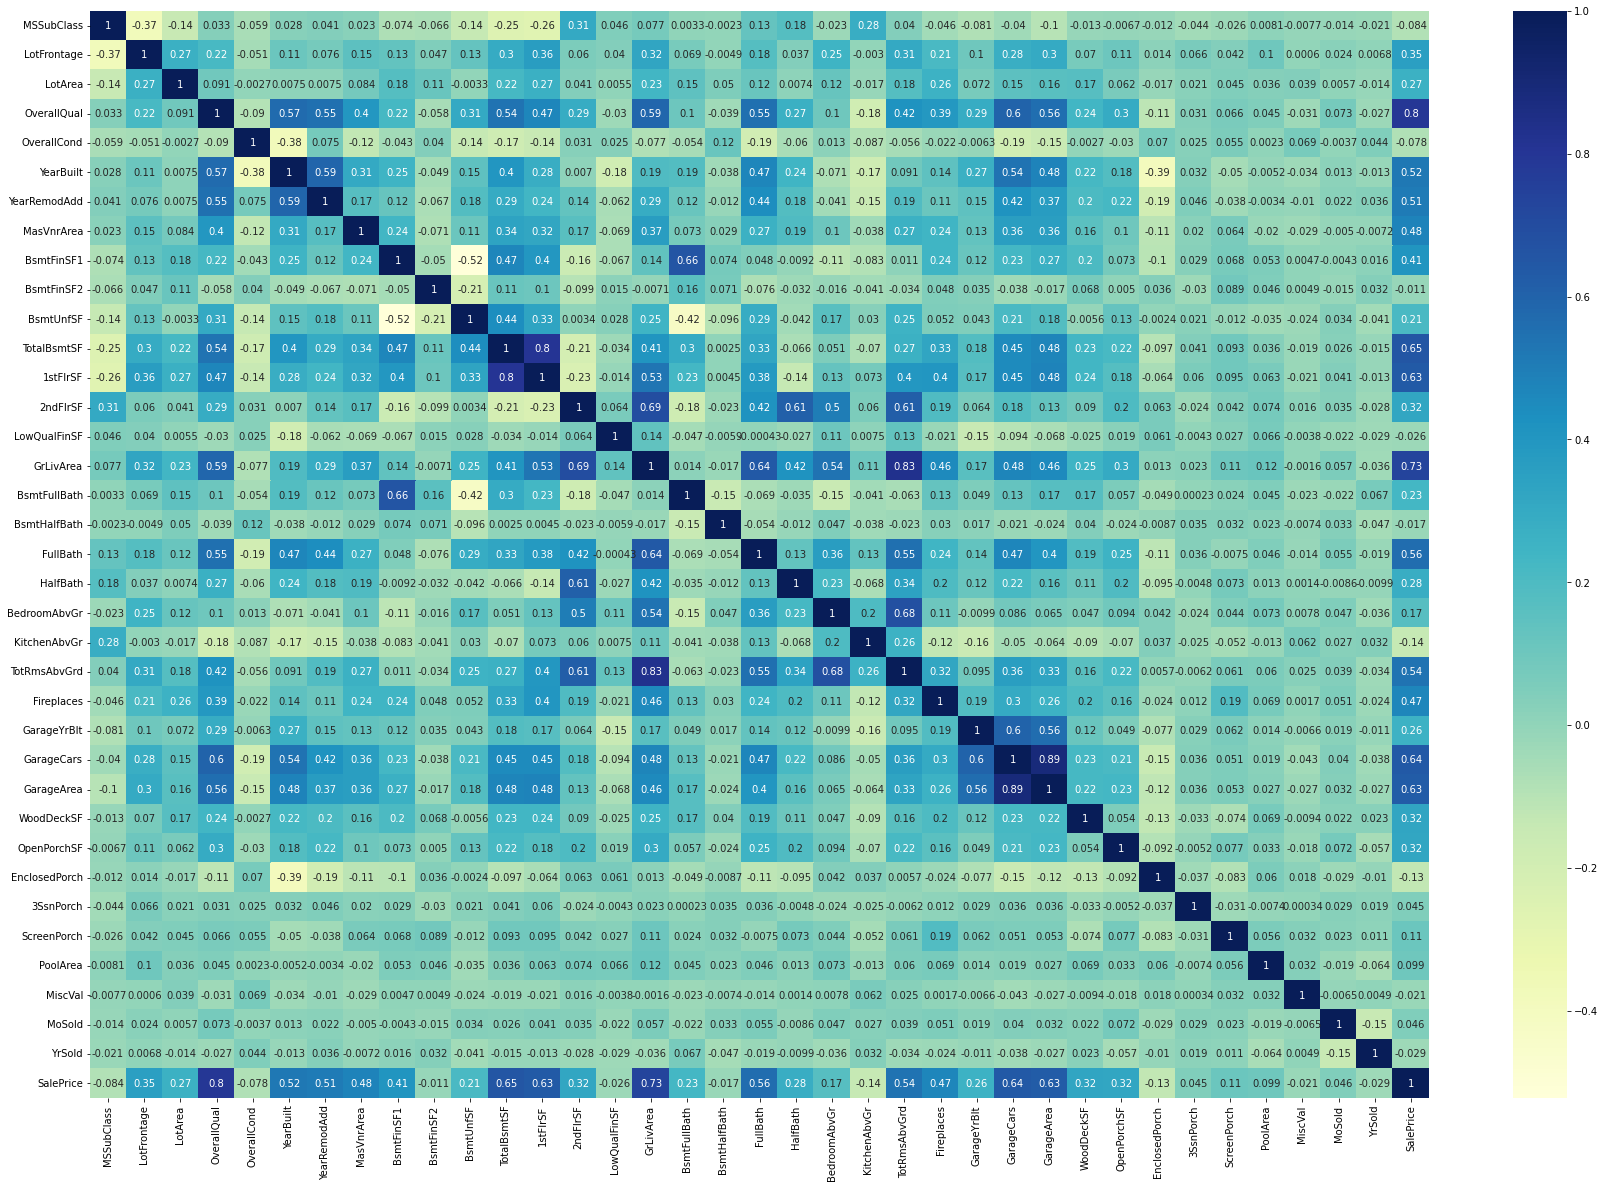

In [ ]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

## We can see that SalePrice is Positively Correlated to OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea
## Correlatiobn Among the Independent variables
TotRmsAbvGrd and GrLivArea,
BsmtFullBath and BsmtFinSF1,
GarageCars and OverallQual,
2ndFlrSF and GrLivArea,
FullBath and GrLivArea


###Handling Categorical Variables

In [ ]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
for name in housing.columns:
    if housing[name].dtypes == "O":
        print(name)
        housing[name] = housing[name].astype(str)
        encoder.fit(housing[name])
        housing[name] = encoder.transform(housing[name])


MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleCondition


In [ ]:
housing['MasVnrType'].value_counts()

2    872
1    445
3    126
0     15
Name: MasVnrType, dtype: int64

In [ ]:
#X, y
y=housing.pop('SalePrice')
X=housing

In [ ]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [ ]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [ ]:
pd.set_option('display.max_columns', None)
#No More missing values
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleCondition
0,60,3,65.0,8450,1,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,0,12,13,1,196.0,2,4,2,2,4,3,2,706,6,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,3,4,1,0,2,2008,4
1,20,3,80.0,9600,1,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,0,8,8,2,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,3,4,1,0,5,2007,4
2,60,3,68.0,11250,1,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,0,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,3,4,1,0,9,2008,4
3,70,3,60.0,9550,1,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,0,13,15,2,0.0,3,4,0,4,1,3,0,216,6,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,3,4,1,0,2,2006,0
4,60,3,84.0,14260,1,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,0,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,3,4,1,0,12,2008,4


In [ ]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

##Model Building and Evaluation

In [ ]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

180554.03312756724
[-3.15172014e+03 -3.97874746e+02  1.74540874e+03  6.17832499e+03
  2.00974114e+03  7.15084071e+02  4.18028254e+01 -5.06498448e+02
 -7.12841812e+02  3.24725401e+02 -1.27833918e+03  3.25245415e+01
 -8.14288206e+01  5.09555513e+02 -2.94886792e+03  1.40898900e+01
  1.02710445e+04  5.93197714e+03  8.55343703e+03 -2.55317835e+02
  1.02163041e+03 -1.59712185e+02 -3.06131814e+03  6.39176009e+02
  4.57593380e+03  7.13465254e+03 -7.46949702e+03  1.18929065e+03
  1.22100435e+03 -4.54954695e+03 -6.02418146e+01 -3.01031875e+03
  2.61205304e+02  6.04785690e+15 -2.18696879e+02  2.25477866e+15
  6.17522148e+15 -5.79661163e+15 -1.02657093e+03 -5.65417341e+02
 -1.95323333e+02 -1.08637070e+03  3.72078976e+16  4.35470127e+16
  4.86611224e+15 -5.07932399e+16 -2.48281709e+02 -6.82991445e+02
 -7.92721370e+02 -2.09217808e+02 -6.73630538e+03 -4.73209024e+03
 -6.57321315e+03  1.04312445e+03  4.10454781e+03  1.17053120e+03
 -1.71884555e+03  2.63439924e+03 -1.57458507e+03 -6.44291981e+02
  4.44

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9017904093706441
0.8850984544899645
670933853085.8906
272163956739.15186
657778287.3391085
621378896.6647303


##Ridge and Lasso Regression

###Ridge Regression

In [ ]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [ ]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1809.64402673    58.50682128  2108.62116686  4327.80859251
  1386.04521827   689.36464598  -996.20299733  -453.50666966
  -686.84311465   -58.46567441   182.83103162  1057.23834455
  -111.66119446   184.11148171 -2217.22331627   391.07457374
  8798.89740371  2835.41343397  2550.25170148  1970.83361036
  2030.35692885  1176.08479517 -1274.48648156  -331.56905774
  2809.22916035  6112.81302036 -6629.92196342   726.66412229
  1613.34645991 -5217.98115529   201.26467845 -2559.19498829
  -841.19175877  6492.2395768   -288.65872573   473.17266228
   457.75841872  7445.34875191  -455.39010746 -2026.29388192
   832.45548694  -389.11568823  7122.44625451  6512.10783245
 -1280.73588528 10677.83606007  1457.68474454  -360.6844989
  3113.6724356   2632.06066342 -1558.70539433 -3049.77940618
 -6453.02331098  4330.2272012   2700.97719377  3427.34580591
 -2067.56877511   347.16853791  -240.4702055  -2004.39701097
  3436.19858334  3625.71416049   -16.99305682   304.31882527
   521.37483687  2479.075

In [ ]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8851090550703006
0.8884059805282504
784895078702.4346
264329515787.10187
769504979.1200339
603492045.1760317


###Lasso

In [ ]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.403e+08, tolerance: 5.283e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.660e+08, tolerance: 5.283e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 1000}


In [ ]:
#Fitting Ridge model for alpha = 1000 and printing coefficients which have been penalised

alpha =1000

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=1000)

In [ ]:
lasso.coef_

array([-3345.24309524,    -0.        ,  1050.48941304,  5172.98457244,
         529.59124505,     0.        ,    -0.        ,    -0.        ,
          -0.        ,     0.        ,    -0.        ,     0.        ,
           0.        ,     0.        , -1468.69079968,     0.        ,
       11527.32375772,  4125.53527539,  7034.63264611,     0.        ,
         619.60120476,     0.        ,  -950.44000055,    -0.        ,
        3652.40623575,  6351.05852877, -7598.56837868,   110.19795675,
         240.34525659, -5221.37622033,     0.        , -2620.36878944,
          -0.        ,  8974.02111294,    -0.        ,    63.56204135,
          -0.        ,  8502.35814853,    -0.        ,  -108.90914668,
           0.        ,    -0.        ,     0.        ,     0.        ,
       -2336.59969473, 34536.80035241,     0.        ,    -0.        ,
           0.        ,     0.        , -3858.24481711, -3451.63165965,
       -7164.46146765,     0.        ,  3351.39224954,   906.63260179,
      

In [ ]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8965204020216297
0.8860371054976386
706936715065.1191
269940601334.2112
693075210.848156
616302742.7721717


In [ ]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.017904e-01,8.851091e-01,8.965204e-01
1,R2 Score (Test),8.850985e-01,8.884060e-01,8.860371e-01
2,RSS (Train),6.709339e+11,7.848951e+11,7.069367e+11
3,RSS (Test),2.721640e+11,2.643295e+11,2.699406e+11
4,MSE (Train),2.564719e+04,2.773995e+04,2.632632e+04
5,MSE (Test),2.492747e+04,2.456608e+04,2.482545e+04


##Lets observe the changes in the coefficients after regularization

In [ ]:
betas = pd.DataFrame(index=X.columns)

In [ ]:
betas.rows = X.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [ ]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [ ]:
betas

,Linear,Ridge,Lasso
MSSubClass,-3.151720e+03,-1809.644027,-3345.243095
MSZoning,-3.978747e+02,58.506821,-0.000000
LotFrontage,1.745409e+03,2108.621167,1050.489413
LotArea,6.178325e+03,4327.808593,5172.984572
Street,2.009741e+03,1386.045218,529.591245
Alley,7.150841e+02,689.364646,0.000000
LotShape,4.180283e+01,-996.202997,-0.000000
LandContour,-5.064984e+02,-453.506670,-0.000000
Utilities,-7.128418e+02,-686.843115,-0.000000
LotConfig,3.247254e+02,-58.465674,0.000000
